In [1]:
import numpy as np
import matplotlib.pylab as plt 
import pandas as pd
import scipy
from sklearn import metrics
from sklearn.cluster import KMeans
from sklearn.datasets import load_digits
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale
%matplotlib inline  
from pylab import rcParams
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import KMeans

# Clustering Data Using K-Means

In [2]:
#predicates= open('predicates.txt')
#classes=open('classes.txt')

In [3]:
#Read in Data
features=[i for i in range(1,86)]
classes=pd.read_fwf('classes.txt', colspecs='infer', widths=None,names=['id','animal']).values
matrix=pd.read_fwf('predicate-matrix-continuous.txt', names=features).values

In [4]:
#Fit and Cluster Data Using 10 Subgroups
n_clusters=10
km=KMeans(n_clusters=10)
km.fit(matrix)

KMeans(copy_x=True, init='k-means++', max_iter=300, n_clusters=10, n_init=10,
    n_jobs=1, precompute_distances='auto', random_state=None, tol=0.0001,
    verbose=0)

In [5]:
# Predict the correct clustering 
clustered_data = km.predict(matrix)

In [6]:
clustered_data

array([7, 0, 9, 4, 2, 2, 7, 2, 9, 2, 3, 3, 8, 1, 8, 1, 6, 9, 1, 6, 1, 5, 1,
       4, 6, 3, 3, 1, 3, 5, 7, 5, 2, 3, 5, 4, 1, 7, 3, 7, 5, 1, 8, 3, 0, 2,
       9, 3, 1, 9], dtype=int32)

In [7]:
classes[1][1]

'grizzly+bear'

In [31]:
#List the data that was clustered
cluster_d = {}
for i in range(50):
    for c in range(10):
            if clustered_data[i] == c:
                try:
                    cluster_d["Cluster %i"%c].append(classes[i][1])
                except:
                    cluster_d["Cluster %i"%c]= []
                    cluster_d["Cluster %i"%c].append(classes[i][1])
for c in range (10):
    print "Cluster %i"%c, cluster_d["Cluster %i"%c], '\n'
    
cluster_d


Cluster 0 ['grizzly+bear', 'polar+bear'] 

Cluster 1 ['hippopotamus', 'moose', 'elephant', 'ox', 'sheep', 'rhinoceros', 'buffalo', 'pig', 'cow'] 

Cluster 2 ['dalmatian', 'persian+cat', 'german+shepherd', 'siamese+cat', 'chihuahua', 'collie'] 

Cluster 3 ['skunk', 'mole', 'hamster', 'squirrel', 'rabbit', 'rat', 'giant+panda', 'mouse', 'raccoon'] 

Cluster 4 ['beaver', 'seal', 'otter'] 

Cluster 5 ['fox', 'bat', 'wolf', 'weasel', 'bobcat'] 

Cluster 6 ['spider+monkey', 'gorilla', 'chimpanzee'] 

Cluster 7 ['antelope', 'horse', 'giraffe', 'zebra', 'deer'] 

Cluster 8 ['tiger', 'leopard', 'lion'] 

Cluster 9 ['killer+whale', 'blue+whale', 'humpback+whale', 'walrus', 'dolphin'] 



{'Cluster 0': ['grizzly+bear', 'polar+bear'],
 'Cluster 1': ['hippopotamus',
  'moose',
  'elephant',
  'ox',
  'sheep',
  'rhinoceros',
  'buffalo',
  'pig',
  'cow'],
 'Cluster 2': ['dalmatian',
  'persian+cat',
  'german+shepherd',
  'siamese+cat',
  'chihuahua',
  'collie'],
 'Cluster 3': ['skunk',
  'mole',
  'hamster',
  'squirrel',
  'rabbit',
  'rat',
  'giant+panda',
  'mouse',
  'raccoon'],
 'Cluster 4': ['beaver', 'seal', 'otter'],
 'Cluster 5': ['fox', 'bat', 'wolf', 'weasel', 'bobcat'],
 'Cluster 6': ['spider+monkey', 'gorilla', 'chimpanzee'],
 'Cluster 7': ['antelope', 'horse', 'giraffe', 'zebra', 'deer'],
 'Cluster 8': ['tiger', 'leopard', 'lion'],
 'Cluster 9': ['killer+whale',
  'blue+whale',
  'humpback+whale',
  'walrus',
  'dolphin']}

# Yes, the data looks accruately clustered

AttributeError: 'FigureCanvasAgg' object has no attribute 'invalidate'

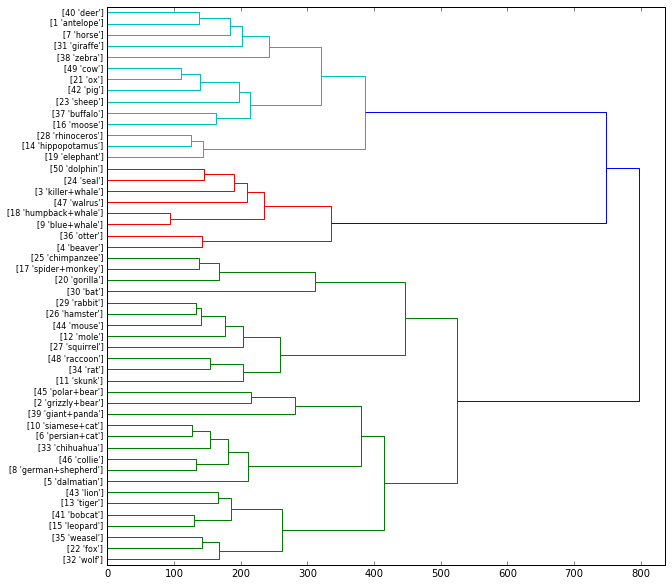

In [9]:
#Print out the clustered data in a dendrogram using the ward linkage method

linked_heirarch = linkage(matrix, 'ward')
rcParams[u'figure.figsize'] = [10, 10]
dendrogram(linked_heirarch, orientation='right', labels=classes)
plt.title('Clustering Dendrogram with 10 Clusters', fontsize=14)
plt.xlabel('Cluster Distance', fontsize=12)
plt.ylabel('Class', fontsize=14)

# Yes, the data looks accruately clustered